# EFRcourier iEEG analyses

This code was used to analyse the EFR open-loop stim data

Write something

# environment: penn replaced by: workshop_311
# Todo: remove stationary periods from navifation time (when subjects stopped playing the game)


In [1]:
# define path for saving figures

# fig_path = '/home1/noaherz/EFRCourier_Analysis/figures'
fig_path = '/home1/noaherz/EFRCourier_Analysis/figures/OpenLoop'

In [3]:
import cmlreaders as cml
from cmlreaders import CMLReader, get_data_index
import matplotlib.pyplot as plt
# from ptsa.data.filters import ButterworthFilter
# from ptsa.data.filters import MorletWaveletFilter
# import xarray as xr
import warnings; warnings.simplefilter('ignore')
import numpy as np
import pandas as pd
# from eeg_check import eeg_check,plot_eeg_check_jlab,erp_sme
import seaborn as sns

choose experiment from which data will be loaded

In [5]:
whole_df = cml.CMLReader.get_data_index() 
whole_df

,Recognition,all_events,contacts,experiment,import_type,localization,math_events,montage,original_experiment,original_session,pairs,ps4_events,session,subject,subject_alias,system_version,task_events
0,NaN,protocols/ltp/subjects/LTP063/experiments/ltpF...,NaN,ltpFR,build,0,protocols/ltp/subjects/LTP063/experiments/ltpF...,0,NaN,0,NaN,NaN,0,LTP063,LTP063,NaN,protocols/ltp/subjects/LTP063/experiments/ltpF...
1,NaN,protocols/ltp/subjects/LTP063/experiments/ltpF...,NaN,ltpFR,build,0,protocols/ltp/subjects/LTP063/experiments/ltpF...,0,NaN,1,NaN,NaN,1,LTP063,LTP063,NaN,protocols/ltp/subjects/LTP063/experiments/ltpF...
2,NaN,protocols/ltp/subjects/LTP063/experiments/ltpF...,NaN,ltpFR,build,0,protocols/ltp/subjects/LTP063/experiments/ltpF...,0,NaN,10,NaN,NaN,10,LTP063,LTP063,NaN,protocols/ltp/subjects/LTP063/experiments/ltpF...
3,NaN,protocols/ltp/subjects/LTP063/experiments/ltpF...,NaN,ltpFR,build,0,protocols/ltp/subjects/LTP063/experiments/ltpF...,0,NaN,11,NaN,NaN,11,LTP063,LTP063,NaN,protocols/ltp/subjects/LTP063/experiments/ltpF...
4,NaN,protocols/ltp/subjects/LTP063/experiments/ltpF...,NaN,ltpFR,build,0,protocols/ltp/subjects/LTP063/experiments/ltpF...,0,NaN,12,NaN,NaN,12,LTP063,LTP063,NaN,protocols/ltp/subjects/LTP063/experiments/ltpF...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,NaN,NaN,NaN,pyFR,NaN,0,NaN,0,NaN,NaN,NaN,NaN,2,UP045,NaN,NaN,NaN
374,NaN,NaN,NaN,pyFR,NaN,0,NaN,0,NaN,NaN,NaN,NaN,3,UP045,NaN,NaN,NaN
375,NaN,NaN,NaN,pyFR,NaN,0,NaN,0,NaN,NaN,NaN,NaN,0,UP046,NaN,NaN,NaN
376,NaN,NaN,NaN,pyFR,NaN,0,NaN,0,NaN,NaN,NaN,NaN,1,UP046,NaN,NaN,NaN


In [7]:
# exp = 'EFRCourierReadOnly'
exp = 'EFRCourierOpenLoop'

In [8]:
whole_df = cml.CMLReader.get_data_index() 
exp_df = whole_df.query('experiment == @exp')
courier_subjects = exp_df['subject'].unique() # all available subjects who ran the task
print('number of subjects in ', exp, len(courier_subjects))
print('number of sessions in ',exp, len(exp_df))

number of subjects in  EFRCourierOpenLoop 8
number of sessions in  EFRCourierOpenLoop 17


In [9]:
exp_df

,Recognition,all_events,contacts,experiment,import_type,localization,math_events,montage,original_experiment,original_session,pairs,ps4_events,session,subject,subject_alias,system_version,task_events
0,NaN,protocols/r1/subjects/FBG490/experiments/EFRCo...,protocols/r1/subjects/FBG490/localizations/0/m...,EFRCourierOpenLoop,build,0,NaN,0,NaN,NaN,protocols/r1/subjects/FBG490/localizations/0/m...,NaN,0,FBG490,FBG490,4.0,protocols/r1/subjects/FBG490/experiments/EFRCo...
1,NaN,protocols/r1/subjects/FBG490/experiments/EFRCo...,protocols/r1/subjects/FBG490/localizations/0/m...,EFRCourierOpenLoop,build,0,NaN,0,NaN,NaN,protocols/r1/subjects/FBG490/localizations/0/m...,NaN,1,FBG490,FBG490,4.0,protocols/r1/subjects/FBG490/experiments/EFRCo...
2,NaN,protocols/r1/subjects/FBG490/experiments/EFRCo...,protocols/r1/subjects/FBG490/localizations/0/m...,EFRCourierOpenLoop,build,0,NaN,0,NaN,NaN,protocols/r1/subjects/FBG490/localizations/0/m...,NaN,2,FBG490,FBG490,4.0,protocols/r1/subjects/FBG490/experiments/EFRCo...
4,NaN,protocols/r1/subjects/FBG491/experiments/EFRCo...,protocols/r1/subjects/FBG491/localizations/0/m...,EFRCourierOpenLoop,build,0,NaN,0,NaN,NaN,protocols/r1/subjects/FBG491/localizations/0/m...,NaN,1,FBG491,FBG491,4.0,protocols/r1/subjects/FBG491/experiments/EFRCo...
5,NaN,protocols/r1/subjects/FBG491/experiments/EFRCo...,protocols/r1/subjects/FBG491/localizations/0/m...,EFRCourierOpenLoop,build,0,NaN,0,NaN,NaN,protocols/r1/subjects/FBG491/localizations/0/m...,NaN,2,FBG491,FBG491,4.0,protocols/r1/subjects/FBG491/experiments/EFRCo...
6,NaN,protocols/r1/subjects/FR491/experiments/EFRCou...,protocols/r1/subjects/FR491/localizations/0/mo...,EFRCourierOpenLoop,build,0,NaN,0,NaN,NaN,protocols/r1/subjects/FR491/localizations/0/mo...,NaN,1,FR491,FR491,4.0,protocols/r1/subjects/FR491/experiments/EFRCou...
7,NaN,protocols/r1/subjects/FR491/experiments/EFRCou...,protocols/r1/subjects/FR491/localizations/0/mo...,EFRCourierOpenLoop,build,0,NaN,0,NaN,NaN,protocols/r1/subjects/FR491/localizations/0/mo...,NaN,2,FR491,FR491,4.0,protocols/r1/subjects/FR491/experiments/EFRCou...
2697,NaN,protocols/r1/subjects/R1620J/experiments/EFRCo...,protocols/r1/subjects/R1620J/localizations/0/m...,EFRCourierOpenLoop,build,0,NaN,0,NaN,NaN,protocols/r1/subjects/R1620J/localizations/0/m...,NaN,3,R1620J,R1620J,4.0,protocols/r1/subjects/R1620J/experiments/EFRCo...
2698,NaN,protocols/r1/subjects/R1620J/experiments/EFRCo...,protocols/r1/subjects/R1620J/localizations/0/m...,EFRCourierOpenLoop,build,0,NaN,0,NaN,NaN,protocols/r1/subjects/R1620J/localizations/0/m...,NaN,4,R1620J,R1620J,4.0,protocols/r1/subjects/R1620J/experiments/EFRCo...
2834,NaN,protocols/r1/subjects/R1653J/experiments/EFRCo...,protocols/r1/subjects/R1653J/localizations/1/m...,EFRCourierOpenLoop,build,1,NaN,1,NaN,NaN,protocols/r1/subjects/R1653J/localizations/1/m...,NaN,0,R1653J,R1653J_1,4.0,protocols/r1/subjects/R1653J/experiments/EFRCo...


In [10]:
# I am having problems loading sub FBG491 so am using only R1620J for now.
courier_subjects
if exp == 'EFRCourierOpenLoop':
#     courier_subjects = ['R1620J']
#     courier_subjects=courier_subjects[4:5] # remove('FBG491')
    # exp_df = exp_df[exp_df.subject != 'FR491']
    courier_subjects = exp_df['subject'].unique() # all available subjects who ran the task
courier_subjects    

array(['FBG490', 'FBG491', 'FR491', 'R1620J', 'R1653J', 'R1693J',
       'R1709J', 'R1724J'], dtype=object)

In [11]:
reader = cml.CMLReader(subject='FBG490', experiment='EFRCourierOpenLoop', session=0)
evs = reader.load('task_events')

In [31]:
evs[evs.type=='WORD']

,eegoffset,correctPointingDirection,eegfile,efr_mark,experiment,finalrecalled,intruded,intrusion,item,itemno,...,serialpos,session,stim_params,store,storeX,storeZ,subject,submittedPointingDirection,trial,type
5,350221,-999.0,FBG490_EFRCourierOpenLoop_0_30Nov22_1330,-999,EFRCourierOpenLoop,0,0,-999,PEPPERONI,-999,...,1,0,"{'_remove': 1, 'amplitude': -1.0, 'anode_label...",pizzeria,-3.070312,-58.500000,FBG490,-999.0,0,WORD
8,391699,-999.0,FBG490_EFRCourierOpenLoop_0_30Nov22_1330,-999,EFRCourierOpenLoop,0,0,-999,RINGE,-999,...,2,0,"{'_remove': 1, 'amplitude': -1.0, 'anode_label...",jewelry_store,-60.000000,-11.500000,FBG490,-999.0,0,WORD
12,478069,-999.0,FBG490_EFRCourierOpenLoop_0_30Nov22_1330,-999,EFRCourierOpenLoop,0,0,-999,SCHOKOLADE,-999,...,3,0,"{'_remove': 1, 'amplitude': -1.0, 'anode_label...",cafe,26.484375,16.953125,FBG490,-999.0,0,WORD
15,533887,-999.0,FBG490_EFRCourierOpenLoop_0_30Nov22_1330,-999,EFRCourierOpenLoop,0,0,-999,BILDERBUCH,-999,...,4,0,"{'_remove': 1, 'amplitude': -1.0, 'anode_label...",toy_store,14.546875,-58.781250,FBG490,-999.0,0,WORD
18,588307,-999.0,FBG490_EFRCourierOpenLoop_0_30Nov22_1330,-999,EFRCourierOpenLoop,0,0,-999,SCHLEIFPAPIER,-999,...,5,0,"{'_remove': 1, 'amplitude': -1.0, 'anode_label...",hardware_store,58.312500,27.937500,FBG490,-999.0,0,WORD
22,639085,-999.0,FBG490_EFRCourierOpenLoop_0_30Nov22_1330,-999,EFRCourierOpenLoop,0,0,-999,MÜSLI,-999,...,6,0,"{'_remove': 1, 'amplitude': -1.0, 'anode_label...",grocery_store,-31.812500,55.718750,FBG490,-999.0,0,WORD
26,725941,-999.0,FBG490_EFRCourierOpenLoop_0_30Nov22_1330,-999,EFRCourierOpenLoop,0,0,-999,SCHAMPOO,-999,...,7,0,"{'_remove': 1, 'amplitude': -1.0, 'anode_label...",barber_shop,36.750000,59.062500,FBG490,-999.0,0,WORD
30,792623,-999.0,FBG490_EFRCourierOpenLoop_0_30Nov22_1330,-999,EFRCourierOpenLoop,0,0,-999,TEIG,-999,...,8,0,"{'_remove': 1, 'amplitude': -1.0, 'anode_label...",bakery,62.343750,-33.500000,FBG490,-999.0,0,WORD
34,854793,-999.0,FBG490_EFRCourierOpenLoop_0_30Nov22_1330,-999,EFRCourierOpenLoop,0,0,-999,T-SHIRT,-999,...,9,0,"{'_remove': 1, 'amplitude': -1.0, 'anode_label...",clothing_store,35.062500,26.656250,FBG490,-999.0,0,WORD
37,900509,-999.0,FBG490_EFRCourierOpenLoop_0_30Nov22_1330,-999,EFRCourierOpenLoop,0,0,-999,VITAMINTABLETTEN,-999,...,10,0,"{'_remove': 1, 'amplitude': -1.0, 'anode_label...",pharmacy,35.406250,-33.125000,FBG490,-999.0,0,WORD


In [48]:
exp_df

,Recognition,all_events,contacts,experiment,import_type,localization,math_events,montage,original_experiment,original_session,pairs,ps4_events,session,subject,subject_alias,system_version,task_events
0,NaN,protocols/r1/subjects/FBG490/experiments/EFRCo...,protocols/r1/subjects/FBG490/localizations/0/m...,EFRCourierOpenLoop,build,0,NaN,0,NaN,NaN,protocols/r1/subjects/FBG490/localizations/0/m...,NaN,0,FBG490,FBG490,4.0,protocols/r1/subjects/FBG490/experiments/EFRCo...
1,NaN,protocols/r1/subjects/FBG490/experiments/EFRCo...,protocols/r1/subjects/FBG490/localizations/0/m...,EFRCourierOpenLoop,build,0,NaN,0,NaN,NaN,protocols/r1/subjects/FBG490/localizations/0/m...,NaN,1,FBG490,FBG490,4.0,protocols/r1/subjects/FBG490/experiments/EFRCo...
2,NaN,protocols/r1/subjects/FBG490/experiments/EFRCo...,protocols/r1/subjects/FBG490/localizations/0/m...,EFRCourierOpenLoop,build,0,NaN,0,NaN,NaN,protocols/r1/subjects/FBG490/localizations/0/m...,NaN,2,FBG490,FBG490,4.0,protocols/r1/subjects/FBG490/experiments/EFRCo...
4,NaN,protocols/r1/subjects/FBG491/experiments/EFRCo...,protocols/r1/subjects/FBG491/localizations/0/m...,EFRCourierOpenLoop,build,0,NaN,0,NaN,NaN,protocols/r1/subjects/FBG491/localizations/0/m...,NaN,1,FBG491,FBG491,4.0,protocols/r1/subjects/FBG491/experiments/EFRCo...
5,NaN,protocols/r1/subjects/FBG491/experiments/EFRCo...,protocols/r1/subjects/FBG491/localizations/0/m...,EFRCourierOpenLoop,build,0,NaN,0,NaN,NaN,protocols/r1/subjects/FBG491/localizations/0/m...,NaN,2,FBG491,FBG491,4.0,protocols/r1/subjects/FBG491/experiments/EFRCo...
6,NaN,protocols/r1/subjects/FR491/experiments/EFRCou...,protocols/r1/subjects/FR491/localizations/0/mo...,EFRCourierOpenLoop,build,0,NaN,0,NaN,NaN,protocols/r1/subjects/FR491/localizations/0/mo...,NaN,1,FR491,FR491,4.0,protocols/r1/subjects/FR491/experiments/EFRCou...
7,NaN,protocols/r1/subjects/FR491/experiments/EFRCou...,protocols/r1/subjects/FR491/localizations/0/mo...,EFRCourierOpenLoop,build,0,NaN,0,NaN,NaN,protocols/r1/subjects/FR491/localizations/0/mo...,NaN,2,FR491,FR491,4.0,protocols/r1/subjects/FR491/experiments/EFRCou...
2697,NaN,protocols/r1/subjects/R1620J/experiments/EFRCo...,protocols/r1/subjects/R1620J/localizations/0/m...,EFRCourierOpenLoop,build,0,NaN,0,NaN,NaN,protocols/r1/subjects/R1620J/localizations/0/m...,NaN,3,R1620J,R1620J,4.0,protocols/r1/subjects/R1620J/experiments/EFRCo...
2698,NaN,protocols/r1/subjects/R1620J/experiments/EFRCo...,protocols/r1/subjects/R1620J/localizations/0/m...,EFRCourierOpenLoop,build,0,NaN,0,NaN,NaN,protocols/r1/subjects/R1620J/localizations/0/m...,NaN,4,R1620J,R1620J,4.0,protocols/r1/subjects/R1620J/experiments/EFRCo...
2834,NaN,protocols/r1/subjects/R1653J/experiments/EFRCo...,protocols/r1/subjects/R1653J/localizations/1/m...,EFRCourierOpenLoop,build,1,NaN,1,NaN,NaN,protocols/r1/subjects/R1653J/localizations/1/m...,NaN,0,R1653J,R1653J_1,4.0,protocols/r1/subjects/R1653J/experiments/EFRCo...


In [34]:
full_evs=pd.DataFrame([])
for ind,row in exp_df.iterrows():
    # print(row)
    if row['subject']=='FR491':
        continue
    reader = cml.CMLReader(subject=row['subject'], experiment=exp, session=row['session'])
    evs = reader.load('task_events');
#     all_evs = add_phase(evs)

    full_evs = pd.concat([full_evs, evs], ignore_index=True);

#     print(str(sum(full_evs['trial'].unique()>=0))+' delivery days')
print(full_evs['subject'].unique())

['FBG490' 'FBG491' 'R1620J' 'R1653J' 'R1693J' 'R1709J' 'R1724J']


In [49]:
full_evs

,eegoffset,correctPointingDirection,eegfile,efr_mark,experiment,finalrecalled,intruded,intrusion,item,itemno,...,serialpos,session,stim_params,store,storeX,storeZ,subject,submittedPointingDirection,trial,type
0,32771,-999.000,FBG490_EFRCourierOpenLoop_0_30Nov22_1330,-999,EFRCourierOpenLoop,-999,-999,-999,-999,-999,...,-999,0,"{'_remove': 1, 'amplitude': -1.0, 'anode_label...",-999,-999.0000,-999.0000,FBG490,-999.000,-999,START
1,35041,-999.000,FBG490_EFRCourierOpenLoop_0_30Nov22_1330,-999,EFRCourierOpenLoop,-999,-999,-999,-999,-999,...,-999,0,"{'_remove': 1, 'amplitude': -1.0, 'anode_label...",-999,-999.0000,-999.0000,FBG490,-999.000,-999,store mappings
2,299313,-999.000,FBG490_EFRCourierOpenLoop_0_30Nov22_1330,-999,EFRCourierOpenLoop,-999,-999,-999,-999,-999,...,-999,0,"{'_remove': 1, 'amplitude': -1.0, 'anode_label...",-999,-999.0000,-999.0000,FBG490,-999.000,0,TRIAL_START
3,299315,-999.000,FBG490_EFRCourierOpenLoop_0_30Nov22_1330,-999,EFRCourierOpenLoop,-999,-999,-999,-999,-999,...,-999,0,"{'_remove': 1, 'amplitude': -1.0, 'anode_label...",pizzeria,-999.0000,-999.0000,FBG490,-999.000,0,pointing begins
4,322965,178.375,FBG490_EFRCourierOpenLoop_0_30Nov22_1330,-999,EFRCourierOpenLoop,-999,-999,-999,-999,-999,...,-999,0,"{'_remove': 1, 'amplitude': -1.0, 'anode_label...",-999,-999.0000,-999.0000,FBG490,137.625,0,pointing finished
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7469,3295080,-999.000,R1724J_EFRCourierOpenLoop_0_28Jan24_1650,-999,EFRCourierOpenLoop,-999,-999,0,MILK,132,...,11,0,"{'_remove': 1, 'amplitude': -1.0, 'anode_label...",cafe,58.3125,27.9375,R1724J,-999.000,3,REC_WORD
7470,3296898,-999.000,R1724J_EFRCourierOpenLoop_0_28Jan24_1650,-999,EFRCourierOpenLoop,-999,-999,-999,-999,-999,...,-999,0,"{'_remove': 0, 'amplitude': 0.7001953125, 'ano...",-999,-999.0000,-999.0000,R1724J,-999.000,3,STIM
7471,3302896,-999.000,R1724J_EFRCourierOpenLoop_0_28Jan24_1650,-999,EFRCourierOpenLoop,-999,-999,-999,-999,-999,...,-999,0,"{'_remove': 0, 'amplitude': 0.7001953125, 'ano...",-999,-999.0000,-999.0000,R1724J,-999.000,3,STIM
7472,3306564,-999.000,R1724J_EFRCourierOpenLoop_0_28Jan24_1650,-999,EFRCourierOpenLoop,-999,-999,-999,-999,-999,...,-999,0,"{'_remove': 1, 'amplitude': -1.0, 'anode_label...",-999,-999.0000,-999.0000,R1724J,-999.000,3,REC_STOP


In [37]:
# update efr_mark column based on the key presses that happened in between two recall periods
def efr_mark(evs):
    rec_types = ["REC_WORD", "CUED_REC_WORD", "SR_REC_WORD", "FFR_REC_WORD"]

    for rec_type in rec_types:
        rec_evs = evs.query('type == @rec_type')
        for i, row in rec_evs.reset_index().iterrows():
            if i == len(rec_evs)-1:
                continue

            curr_rec_time = row.mstime
            next_rec_time = rec_evs.iloc[i+1].mstime

            key_press_evs = evs.query('@curr_rec_time < mstime < @next_rec_time & type == "EFR_MARK"')
            if len(key_press_evs) > 0:
                evs.at[row["index"], "efr_mark"] = 1
    return(evs)

In [39]:
full_evs_new=efr_mark(full_evs)
full_evs_new.iloc[30:50]

array([-999,    1,    0])

In [43]:
# full_evs_new[full_evs_new.efr_mark==1]

In [44]:
# add 'phase' column to events df (with 'encoding', 'retrieval' for FR, FFR (final FR) or FSR (final store recall))
def add_phase(evs):
    new_evs = pd.DataFrame([])
    for temp,sub_evs in evs.groupby('subject'):
        for ind,list_evs in sub_evs.groupby('trial'): # 'trial' is the aquivalent of a delivery day
            if list_evs['trial'].unique()!=-999:
                list_evs['phase']='nan'

                # find indexes of encoding start and end
                try:
                    first_pointing_index = min(list_evs[list_evs['type']=='pointing begins'].index)
                    navigation_end_index = min(list_evs[list_evs['type']=='TRIAL_END'].index)-1
                    list_evs.loc[first_pointing_index:navigation_end_index]['phase']='encoding'
                
                    # find indexes of retrieval start and end
                    rec_start_index = list_evs[list_evs['type']=='REC_START'].index[0]
                    rec_end_index = list_evs[list_evs['type']=='REC_STOP'].index[0]
                    list_evs.loc[rec_start_index:rec_end_index]['phase']='retrieval'

                    if len(list_evs[list_evs.type=='FSR_START'])>0: # relevant only for the final trial
                        # find indexes of Final FR for stores start and end
                        FSR_start_index = list_evs[list_evs['type']=='FSR_START'].index[0]
                        FSR_end_index = list_evs[list_evs['type']=='FSR_STOP'].index[0]
                        list_evs.loc[FSR_start_index:FSR_end_index]['phase']='FSR'

                         # find indexes of Final FR for items start and end
                        FFR_start_index = list_evs[list_evs['type']=='FFR_START'].index[0]
                        FFR_end_index = list_evs[list_evs['type']=='FFR_STOP'].index[0]
                        list_evs.loc[FFR_start_index:FFR_end_index]['phase']='FFR'
                except:
                    print('error in ',list_evs['subject'].unique()+'tril: '+str(list_evs['trial'].unique()))
            elif list_evs['trial'].unique()==-999:
                list_evs['phase']='nan'


            new_evs=pd.concat([new_evs,list_evs])

    return new_evs



In [12]:
# evs2[['phase','subject','submittedPointingDirection', 'trial', 'type']][230:260]

In [45]:
full_evs_new=add_phase(full_evs)
full_evs_new

error in  ['R1653Jtril: [-1]']
error in  ['R1693Jtril: [-1]']
error in  ['R1693Jtril: [3]']
error in  ['R1709Jtril: [-1]']
error in  ['R1724Jtril: [-1]']


,eegoffset,correctPointingDirection,eegfile,efr_mark,experiment,finalrecalled,intruded,intrusion,item,itemno,...,serialpos,session,stim_params,store,storeX,storeZ,subject,submittedPointingDirection,trial,type
0,32771,-999.0,FBG490_EFRCourierOpenLoop_0_30Nov22_1330,-999,EFRCourierOpenLoop,-999,-999,-999,-999,-999,...,-999,0,"{'_remove': 1, 'amplitude': -1.0, 'anode_label...",-999,-999.0000,-999.0000,FBG490,-999.0,-999,START
1,35041,-999.0,FBG490_EFRCourierOpenLoop_0_30Nov22_1330,-999,EFRCourierOpenLoop,-999,-999,-999,-999,-999,...,-999,0,"{'_remove': 1, 'amplitude': -1.0, 'anode_label...",-999,-999.0000,-999.0000,FBG490,-999.0,-999,store mappings
533,6747845,-999.0,FBG490_EFRCourierOpenLoop_0_30Nov22_1330,-999,EFRCourierOpenLoop,-999,-999,-1,<>,-1,...,-999,0,"{'_remove': 1, 'amplitude': -1.0, 'anode_label...",-999,-999.0000,-999.0000,FBG490,-999.0,-999,SR_REC_WORD_VV
534,6749481,-999.0,FBG490_EFRCourierOpenLoop_0_30Nov22_1330,-999,EFRCourierOpenLoop,-999,-999,-1,BAUMARKT,5,...,-999,0,"{'_remove': 1, 'amplitude': -1.0, 'anode_label...",-999,-999.0000,-999.0000,FBG490,-999.0,-999,SR_REC_WORD
536,6752603,-999.0,FBG490_EFRCourierOpenLoop_0_30Nov22_1330,-999,EFRCourierOpenLoop,-999,-999,0,PIZZERIA,14,...,-999,0,"{'_remove': 1, 'amplitude': -1.0, 'anode_label...",-999,-999.0000,-999.0000,FBG490,-999.0,-999,SR_REC_WORD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7469,3295080,-999.0,R1724J_EFRCourierOpenLoop_0_28Jan24_1650,-999,EFRCourierOpenLoop,-999,-999,0,MILK,132,...,11,0,"{'_remove': 1, 'amplitude': -1.0, 'anode_label...",cafe,58.3125,27.9375,R1724J,-999.0,3,REC_WORD
7470,3296898,-999.0,R1724J_EFRCourierOpenLoop_0_28Jan24_1650,-999,EFRCourierOpenLoop,-999,-999,-999,-999,-999,...,-999,0,"{'_remove': 0, 'amplitude': 0.7001953125, 'ano...",-999,-999.0000,-999.0000,R1724J,-999.0,3,STIM
7471,3302896,-999.0,R1724J_EFRCourierOpenLoop_0_28Jan24_1650,-999,EFRCourierOpenLoop,-999,-999,-999,-999,-999,...,-999,0,"{'_remove': 0, 'amplitude': 0.7001953125, 'ano...",-999,-999.0000,-999.0000,R1724J,-999.0,3,STIM
7472,3306564,-999.0,R1724J_EFRCourierOpenLoop_0_28Jan24_1650,-999,EFRCourierOpenLoop,-999,-999,-999,-999,-999,...,-999,0,"{'_remove': 1, 'amplitude': -1.0, 'anode_label...",-999,-999.0000,-999.0000,R1724J,-999.0,3,REC_STOP


In [47]:
full_evs_new.phase.unique()

array(['nan'], dtype=object)

## Trial summary table

create a df with trials summary 
(to decide who's included in the analysis based on inclusion criteria)


In [13]:
# create a df with trials summary (to decide who's included in the analysis based on inclusion criteria)

subject_info=pd.DataFrame([]) # stores data through the analysis
output_position=pd.DataFrame([]) 
semantic_relatedness_freq=np.nan
semantic_nonrelated_freq = np.nan

for sub in courier_subjects: # ['TJ019']:
    data=[]
    chosen_trials=[]
    excluded_trials=[] # added

    try:
        df = get_data_index("r1")
        number_of_loc=df[(df['subject']==sub) & (df['experiment']==exp)]['localization'].unique()
              
        for loc in number_of_loc:
            montages = df[(df['subject']==sub) & (df['experiment']==exp) & (df['localization']==loc)]['montage'].unique()
            assert len(montages)>0
           
            for mont in montages: # iterate over montages            
                data = df[np.logical_and(df["subject"] == sub, df['experiment']==exp)]
                sessions=data[np.logical_and(data['montage']==mont,data['localization']==loc)]['session'].unique()
                assert len(sessions)!=0
                
                for sess in sessions: # iterate over sessions
                    reader = CMLReader(sub, exp, sess, montage=mont, localization=loc)   #reader for loading CML data

                    evs = reader.load('task_events')#'events' will also do, but you'll get some extra stuff
                    evs=evs[evs['trial']>=0] # delete negative lists
                    evs = efr_mark(evs) # ADD EFR mark
                    if any(evs.columns=='item'): # for pyfr
                        item_column='item'
                    elif any(evs.columns=='item_name'): # for r1
                        item_column='item_name'
                                    
                    # number of lists
                    num_lists=evs.trial.unique()
                    num_lists=len(num_lists[num_lists>=0])

                    # define the three classes of retrieval events
                    recalled_events = evs[evs['type']=='REC_WORD']
                    assert all(recalled_events['trial']>=0),'negative list number' # make sure no negative number of list exist

                    total_rec_events=len(recalled_events[recalled_events[item_column]!='<>']) # added to compute percentage of excluded trials
                    
                    # Usually I take events that were preceded by 3,000 ms of 'silence'
                    # Here I removed this limitation so am using 0 as the minimum time of silence needed
                    silence_period = 0 # or s000 (in ms)
                    for list_n in recalled_events['trial'].unique():
                        list_events=recalled_events[recalled_events['trial']==list_n]
                        if len(list_events)>0 and list_events.iloc[0]['rectime']>=silence_period and silence_period!=0: # handle first response
                            excluded_trials.append([sess,mont,list_events.index[0]]) # I always discard the first recall. In order to include it, replace 'excluded_trials' here with 'chosen_trials'.
                        elif silence_period!=0:
                            excluded_trials.append([sess,mont,list_events.index[0]])
                        if len(list_events)>1:
                            for i in range(1,len(list_events)):
                                diff=list_events['rectime'].iloc[i]-list_events['rectime'].iloc[i-1] # time diff between recalls
                                if diff>=silence_period:
                                    chosen_trials.append([sess,mont,list_events.index[i]])               
                                else:
                                    excluded_trials.append([sess,mont,list_events.index[0]])
                                    
                    sess_excluded_trials=[trial for session,monti,trial in excluded_trials if (session==sess and monti==mont)]
                    sess_chosen_trials=[trial for session,monti,trial in chosen_trials if (session==sess and monti==mont)]
                    temp_data=recalled_events.loc[sess_chosen_trials]
                    
#                     # delete events that were not eeg recorded
#                     no_eeg_events=temp_data[temp_data['eegoffset']<0].index
#                     temp_data=temp_data.drop(labels=no_eeg_events)
#                     if len(no_eeg_events)>0:
#                         for no_eeg_row in no_eeg_events:
#                             sess_chosen_trials.remove(no_eeg_row)
                    
                    # Delete all word repetitions (Long et al. also rejected all repetitions in correct recall and intrusions)
                    rows_to_delete=[]
                    verbalization_indexes=[]
                    for list_n in temp_data['trial'].unique():
                        list_events=temp_data[temp_data['trial']==list_n]
                        words_in_session = list_events[item_column]
                        for word in words_in_session:
                            if '?' in word:
                                word=word.split('?')[0]
                            count=words_in_session.str.count(word)
                            if sum(count)>1:
#                                 print('subject',sub,' session ',sess,'has repetitions')
                                rows_to_delete.extend(words_in_session.index[count!=0][1:]) # leave only the first index of occurance
                        verbalization_indexes.extend(words_in_session[words_in_session=='<>'].index) # reject non-word verbalization (which are coded as ELI's)


#                     # unique row numbers to delete            
#                     rows_to_delete_array = np.asarray(rows_to_delete)
#                     rows_to_delete_array=np.unique(rows_to_delete_array)

#                      # delete repeating words
#                     temp_data=temp_data.drop(labels=rows_to_delete_array);
#                     for trial in rows_to_delete_array:
#                         sess_chosen_trials.remove(trial)
#                         if any(verbalization_indexes==trial):
#                             verbalization_indexes.remove(trial)
                    
                    
                    # count number of intrusions:
                    non_verbalization=temp_data[temp_data[item_column]!='<>'] # exclude verbalization from count of ELI's
                    intrusions_freq=sum(non_verbalization['intrusion']!=0)
                    extra_list_intrusions_freq=sum(non_verbalization['intrusion']==-1) #-1 for extra-list intrusion
                    prior_list_intrusions_freq=sum(non_verbalization['intrusion']>0)
                    assert extra_list_intrusions_freq + prior_list_intrusions_freq == intrusions_freq, f'there''s an error in calculating the number of intrusions'
                    # count EFR key presses
                    Key_correct = len(non_verbalization.query("efr_mark==1 and intrusion == 0"))
                    nonKey_correct = len(non_verbalization.query("efr_mark==-999 and intrusion == 0"))
                    nonKey_intrusion = len(non_verbalization.query("efr_mark==-999 and intrusion != 0"))
                    Key_intrusion = len(non_verbalization.query("efr_mark==1 and intrusion != 0"))
                    
                    # count number of ELI/PLI and rejected/accepted
                    key_eli = len(non_verbalization.query("efr_mark==1 and intrusion < 0"))
                    nonkey_eli = len(non_verbalization.query("efr_mark==-999 and intrusion < 0"))
                    key_pli = len(non_verbalization.query("efr_mark==1 and intrusion > 0"))
                    nonkey_pli = len(non_verbalization.query("efr_mark==-999 and intrusion > 0"))

                    # output position
                    for list_n in temp_data['trial'].unique():
                        recalled_events_within_list=recalled_events[recalled_events['trial']==list_n]
                        for recalled_word in temp_data[temp_data['trial']==list_n][item_column]:
                            for jj in range(0,len(recalled_events_within_list)):
                                if recalled_events_within_list[item_column].iloc[jj]==recalled_word:
                                    output_pos={'subject':sub,'session':sess,'montage':mont,'localization':loc,'word recalled':[recalled_word],'intrusion': recalled_events_within_list['intrusion'].iloc[jj],'recalled': recalled_events_within_list['recalled'].iloc[jj],'list':[list],'output position': [jj+1]}
                                    output_position=pd.concat([pd.DataFrame([output_pos['output position']]),output_position],ignore_index=True)
                                    break # so that the output position will reflect the first recall of the word

                    if len((sess_chosen_trials) and (verbalization_indexes))>0:
                        for elem in (sess_chosen_trials) and (verbalization_indexes):
                            sess_chosen_trials.remove(elem)
                    #print(str(sess)+' completed successfully!')

                    subject_in = {'subject': sub, 'experiment':exp,'localization': loc, 'montage': mont, 'session':sess, 
                                                'number of lists': num_lists,
                                                'number of trials left':len(temp_data),'total number of intrusions':intrusions_freq,
                                                'number of rejected ELI':key_eli,'number of rejected PLI':key_pli,
                                                'number of nonrejected ELI':nonkey_eli,'number of nonrejected PLI':nonkey_pli,
                                                'number of rejected intrusion': Key_intrusion,'number of nonrejected intrusion': nonKey_intrusion,
                                                'number of rejected correct': Key_correct,'number of nonrejected correct': nonKey_correct, 'trials for analysis':sess_chosen_trials,'trials excluded':sess_excluded_trials,'total_rec_events':total_rec_events,'<>verbalization_trials':verbalization_indexes}

                    subject_in_df=pd.DataFrame(list(subject_in.items())).T
                    # Replacing Header with Top Row
                    subject_header, subject_header.columns = subject_in_df[1:] , subject_in_df.iloc[0]
                    #
                    subject_info = pd.concat([subject_info,subject_header])
                                        
    except:
        print('error: sub ',sub, 'session ',sess,' experiment is: ',exp)
        pass

In [14]:
# See the output
subject_info.head()

,subject,experiment,localization,montage,session,number of lists,number of trials left,total number of intrusions,number of rejected ELI,number of rejected PLI,number of nonrejected ELI,number of nonrejected PLI,number of rejected intrusion,number of nonrejected intrusion,number of rejected correct,number of nonrejected correct,trials for analysis,trials excluded,total_rec_events,<>verbalization_trials
1,FBG490,EFRCourierOpenLoop,0,0,0,5,39,6,2,0,4,0,2,4,4,29,"[51, 54, 55, 56, 57, 59, 162, 163, 166, 168, 1...",[],44,[]
1,FBG490,EFRCourierOpenLoop,0,0,1,5,47,9,3,2,2,2,5,4,3,35,"[50, 51, 53, 54, 60, 63, 67, 68, 71, 76, 166, ...",[],52,[]
1,FBG490,EFRCourierOpenLoop,0,0,2,5,49,9,1,1,6,1,2,7,1,39,"[50, 51, 53, 54, 56, 59, 61, 63, 68, 70, 160, ...",[],54,[]
1,FBG491,EFRCourierOpenLoop,0,0,1,5,42,17,5,4,3,5,9,8,6,19,"[52, 53, 54, 56, 57, 62, 66, 72, 76, 175, 178,...",[],47,[]
1,FBG491,EFRCourierOpenLoop,0,0,2,5,40,11,3,1,7,0,4,7,6,23,"[54, 55, 56, 58, 59, 60, 62, 64, 69, 168, 169,...",[],45,[]


### Plot trials distribution

#### plot number of correct recalls/intrusions

In [17]:
#choose column to plot
colomn_name = 'total number of intrusions'
total_correct = subject_info['number of rejected correct'] + subject_info['number of nonrejected correct']


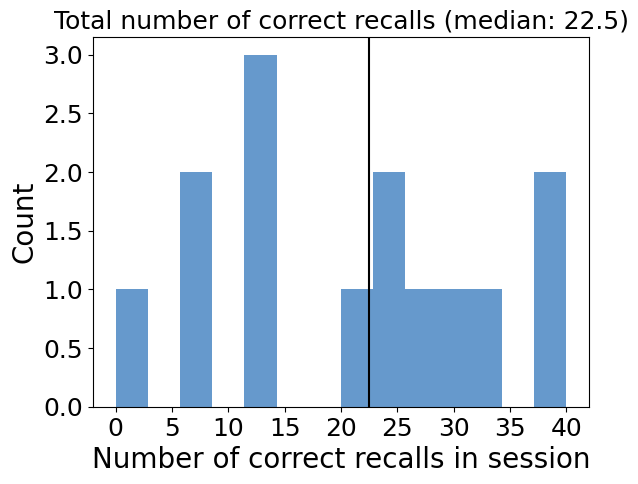

In [18]:
# fig, ax = plt.subplots(figsize=(12,8))

## to plot number of intrusions:
# median = np.median(subject_info[colomn_name])
# plt.hist(subject_info[colomn_name], color=(0.4,0.6,0.8))#, range=(0, 100))

# to plot correct recalls
median = np.median(total_correct)
plt.hist(total_correct, color=(0.4,0.6,0.8),bins=14)#, range=(0, 100))

plt.axvline(median, color="k")
plt.title("Total number of correct recalls (median: {})".format(median), fontsize=18)
plt.xlabel("Number of correct recalls in session", fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
# ax.spines.top.set_visible(False)
# ax.spines.right.set_visible(False)

# plt.savefig(f"{fig_path}/correct_dist.pdf",transparent=True,bbox_inches='tight', pad_inches=0.08,format='pdf')

plt.show()

#### Plot ELIs PLIs

In [19]:
# convert to long_format
long_df = pd.melt(subject_info, id_vars='subject', value_vars=['number of nonrejected PLI','number of rejected PLI','number of nonrejected ELI','number of rejected ELI'], var_name='intrusion type', value_name='Intrusion count')
# long_df



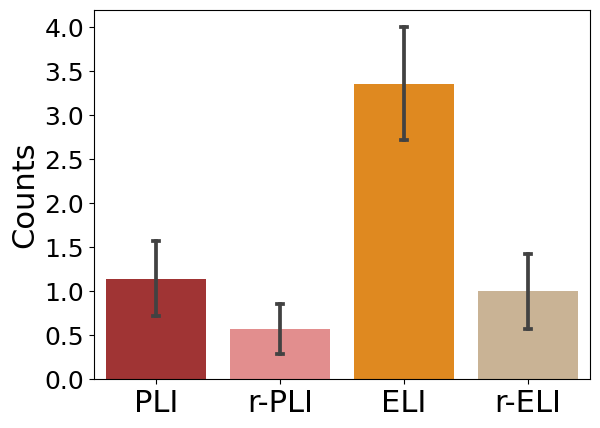

In [20]:
# fig, ax = plt.figure(figsize=(12,8))
cols = ['firebrick','lightcoral','darkorange','tan']
p=sns.barplot(data=long_df, 
                x="intrusion type",
                order=["number of nonrejected PLI", "number of rejected PLI", "number of nonrejected ELI", "number of rejected ELI"],
                y="Intrusion count",
                ci=68,
                capsize=0.05,palette=cols)
# sns.swarmplot(data=long_df, x="intrusion type", y="Intrusion count",color='darkgrey',alpha = 0.95,size=7)

plt.xticks(fontsize=22)
plt.yticks(fontsize=18)
plt.xlabel("")
plt.ylabel("Counts", fontsize=22)
# ax.yaxis.grid()
# ax.spines.top.set_visible(False)
# ax.spines.right.set_visible(False)
plt.xticks([0,1,2,3],['PLI','r-PLI','ELI','r-ELI'],fontsize=22, rotation=0) # r=rejected

# plt.savefig(f"{fig_path}/PLI_ELI.pdf",transparent=True,bbox_inches='tight', pad_inches=0.08,format='pdf')

plt.show()

#### Plot summary table

# Open Loop behavioural analyses

In [13]:
evs=evs.drop(columns=['stim_params'])# otherwise ptsa won't work
# reader = cml.CMLReader(subject=row['subject'], experiment=exp, session=row['session'],montage=sub_df.iloc[0]['montage'],localization=sub_df.iloc[0]['localization'])
reader = cml.CMLReader(subject=row['subject'], experiment=exp, session=row['session'])

word_evs = evs[evs.type=='WORD']
# word_evs=word_evs.drop['stim_params']
pairs = reader.load('pairs')
pairs
buf = 2000
eeg= reader.load_eeg(word_evs, rel_start=-500 - buf, rel_stop=500 + buf, scheme=pairs)#.to_ptsa()
eeg_ptsa = eeg.to_ptsa()


## Stim during encoding

In [14]:
# error in  ['R1693J trial: [3]'] results from the fact the this trial was started but immidiately abborted.
full_evs=add_phase(full_evs)

error in  ['R1653Jtril: [-1]']
error in  ['R1693Jtril: [-1]']
error in  ['R1693Jtril: [3]']
error in  ['R1709Jtril: [-1]']


#### Split dataframe to events stimmed ['Esim'] / not-stimmed ['Enostim'] during encoding:


In [15]:
# Split dataframe to events stimmed['Esim']/not-stimmed ['Enostim'] during encoding:
Estim=pd.DataFrame([]);
Enostim=pd.DataFrame([])


encoding_evs = full_evs[full_evs['phase']=='retrieval']
stim_words=[]; nonstim_words=[]
for indx in range(len(encoding_evs)):
    if indx > 0:
        if encoding_evs.iloc[indx]['type']=='WORD' and encoding_evs.iloc[indx-1]['type']=='STIM':
            stim_words.append(encoding_evs.iloc[indx]['item'])
        elif encoding_evs.iloc[indx]['type']=='WORD' and encoding_evs.iloc[indx-1]['type']=='pointing finished':
            nonstim_words.append(encoding_evs.iloc[indx]['item'])
    elif indx == 0: # account for first item in list
            if encoding_evs.iloc[indx]['type']=='WORD':
                nonstim_words.append(encoding_evs.iloc[indx]['item'])

#     assert(len(stim_words)  + len(nonstim_words))==27 ,f'Error in words number: subject {ret_stim_subject} session {ret_stim_session} list {ret_stim_list}'      
Estim=Estim.append(encoding_evs[encoding_evs['item'].isin(stim_words)])
Enostim=Enostim.append(encoding_evs[encoding_evs['item'].isin(nonstim_words)])


#### Split dataframe to events stimmed / not-stimmed during Retrieval:

In [16]:
# how much time was the free-recall period? Should be 90 sec.
# notice that 'eegoffset' represent the sampling rate, which was different (twice as fast) for the Freiburg patients.
def Retrieval_time(evs):
    for i,trial_data in evs.groupby(['subject','trial','session']):
        rec_start_ms = trial_data[trial_data.type=='REC_START'].mstime
        rec_end_ms   = trial_data[trial_data.type=='REC_STOP'].mstime
        try:
            print(trial_data.subject.unique(),trial_data.trial.unique(),int(rec_end_ms) - int(rec_start_ms),' ms' )
        except:
            print('problem with: ',trial_data.subject.unique(),' trial: ', trial_data.trial.unique())

In [17]:
Retrieval_time(full_evs)

problem with:  ['FBG490']  trial:  [-999]
problem with:  ['FBG490']  trial:  [-999]
problem with:  ['FBG490']  trial:  [-999]
['FBG490'] [0] 90427  ms
['FBG490'] [0] 91406  ms
['FBG490'] [0] 91862  ms
['FBG490'] [1] 90926  ms
['FBG490'] [1] 90149  ms
['FBG490'] [1] 90476  ms
['FBG490'] [2] 91569  ms
['FBG490'] [2] 90454  ms
['FBG490'] [2] 91597  ms
['FBG490'] [3] 92046  ms
['FBG490'] [3] 91577  ms
['FBG490'] [3] 90885  ms
['FBG490'] [4] 90204  ms
['FBG490'] [4] 91558  ms
['FBG490'] [4] 90002  ms
problem with:  ['FBG491']  trial:  [-999]
problem with:  ['FBG491']  trial:  [-999]
['FBG491'] [0] 91841  ms
['FBG491'] [0] 90926  ms
['FBG491'] [1] 91135  ms
['FBG491'] [1] 90468  ms
['FBG491'] [2] 92073  ms
['FBG491'] [2] 90060  ms
['FBG491'] [3] 90109  ms
['FBG491'] [3] 90146  ms
['FBG491'] [4] 90009  ms
['FBG491'] [4] 90005  ms
problem with:  ['R1620J']  trial:  [-999]
problem with:  ['R1620J']  trial:  [-999]
['R1620J'] [0] 90006  ms
['R1620J'] [0] 90006  ms
['R1620J'] [1] 89923  ms
['R162

In [102]:
full_evs[full_evs.subject=='FBG490'][['mstime','type','eegoffset']]

,mstime,type,eegoffset
0,1669811467314,START,32771
1,1669811468449,store mappings,35041
533,1669814824851,SR_REC_WORD_VV,6747845
534,1669814825669,SR_REC_WORD,6749481
536,1669814827230,SR_REC_WORD,6752603
...,...,...,...
1943,1669912872566,STIM,6255097
1946,1669912884567,STIM,6279099
1948,1669912896570,STIM,6303105
1951,1669912907828,FFR_STOP,6325621


In [21]:
#temp:
chosen_evs[['subject', 'trial', 'type','eegoffset','phase','eegoffset']][34:55]

,subject,trial,type,eegoffset,phase,eegoffset
168,FBG490,1,REC_WORD,2446895,retrieval,2446895
169,FBG490,1,STIM,2447263,retrieval,2447263
170,FBG490,1,REC_WORD_VV,2458443,retrieval,2458443
171,FBG490,1,REC_WORD,2463775,retrieval,2463775
172,FBG490,1,STIM,2471265,retrieval,2471265
173,FBG490,1,REC_WORD,2487555,retrieval,2487555
174,FBG490,1,STIM,2495269,retrieval,2495269
175,FBG490,1,REC_WORD,2514497,retrieval,2514497
176,FBG490,1,STIM,2519271,retrieval,2519271
177,FBG490,1,REC_STOP,2527493,retrieval,2527493


retrieval stim was supposed to be launched every 6 sec (3-sec on-off train).
FBG491: stim events happen every 12000 ms 
FBG490: stim events happen every 24000 ms 
R1620J: 5999

In [18]:
# Split dataframe to events stimmed['Esim']/not-stimmed ['Enostim'] during encoding:
Estim=pd.DataFrame([]);
Enostim=pd.DataFrame([])


chosen_evs = full_evs[full_evs['phase']=='retrieval']
stim_words=[]; nonstim_words=[]
for indx in range(len(chosen_evs)):
    if indx > 0:
        if chosen_evs.iloc[indx]['type']=='WORD' and encoding_evs.iloc[indx-1]['type']=='STIM':
            stim_words.append(encoding_evs.iloc[indx]['item'])
        elif chosen_evs.iloc[indx]['type']=='WORD' and encoding_evs.iloc[indx-1]['type']=='pointing finished':
            nonstim_words.append(encoding_evs.iloc[indx]['item'])
    elif indx == 0: # account for first item in list
            if chosen_evs.iloc[indx]['type']=='WORD':
                nonstim_words.append(encoding_evs.iloc[indx]['item'])

#     assert(len(stim_words)  + len(nonstim_words))==27 ,f'Error in words number: subject {ret_stim_subject} session {ret_stim_session} list {ret_stim_list}'      
Estim=Estim.append(encoding_evs[encoding_evs['item'].isin(stim_words)])
Enostim=Enostim.append(encoding_evs[encoding_evs['item'].isin(nonstim_words)])


NameError: name 'encoding_evs' is not defined

In [29]:
chosen_evs = full_evs[full_evs['phase']=='retrieval']
chosen_evs = chosen_evs[chosen_evs['subject'] == 'FBG490']
chosen_evs[['subject','trial','eegoffset','mstime','session','type','phase']][50:70]

,subject,trial,eegoffset,mstime,session,type,phase
269,FBG490,2,3586043,1669813243950,0,REC_WORD,retrieval
270,FBG490,2,3592447,1669813247152,0,REC_WORD,retrieval
271,FBG490,2,3596763,1669813249310,0,STIM,retrieval
272,FBG490,2,3620763,1669813261310,0,STIM,retrieval
273,FBG490,2,3623203,1669813262530,0,REC_WORD,retrieval
274,FBG490,2,3644763,1669813273310,0,STIM,retrieval
275,FBG490,2,3668767,1669813285312,0,STIM,retrieval
276,FBG490,2,3674573,1669813288215,0,REC_WORD,retrieval
277,FBG490,2,3676567,1669813289212,0,EFR_MARK,retrieval
278,FBG490,2,3692769,1669813297313,0,STIM,retrieval


In [116]:
#FBG490 trial 0:
1669812067179-1669812055178

12001

In [119]:
#FBG490 trial 1:
1669812638553 - 1669812626550
1669812710564 - 1669812698563

12001

In [33]:
#FBG490 trial 2:
# 1669813285312 - 1669813273310
# 1669813261310 - 1669813249310
1669813321316 - 1669813309313

12003

In [122]:
#FBG490 trial 3:
1669813961459 - 1669813949453

12006

In [124]:
#FBG491 trial 0:
1676024532937 - 1676024526989

5948

In [126]:
#FBG491 trial 1:
1676025371324 - 1676025365325

5999

In [113]:
R1709J: 1699401884341 - 1699401878341

6000

find desired index of channel

### choose which contacts to plot:
1. only the stimulated pair
2. only the non-stimulated contacts from the stimulated electrode
3. all electrdoes other than the stimulated electrode

In [36]:
pairs = reader.load('pairs')

# 1. if only the stim pair should be plotted
for label_i in labels:
    stim_ind = pairs[pairs['label'] == label_i].index

# ## 2. if the full stim electrode (without stim pair) should be plotted
# parameters_df['Anode'][0]
# elec_string=''.join([i for i in parameters_df['Anode'][0] if not i.isdigit()])
# ind_counter = -1
# stim_ind=[]
# for label_i in pairs['label']:
#     ind_counter = ind_counter+1
#     if elec_string in label_i:
#         stim_ind.append(ind_counter)
# for label_i in labels: # reomove stim pair
#     stim_pair = pairs[pairs['label'] == label_i].index
# stim_ind.remove(stim_pair[0])
# # remove contacts with one of the stim pairs:
# stim_ind.remove(stim_pair[0]-1)
# stim_ind.remove(stim_pair[0]+1)


# ## 3. if all electrodes BUT the stim electrode should be plotted
# parameters_df['Anode'][0]
# elec_string=''.join([i for i in parameters_df['Anode'][0] if not i.isdigit()])
# ind_counter = -1
# remove_stim_ind=[]
# for label_i in pairs['label']:
#     ind_counter = ind_counter+1
#     if elec_string in label_i:
#         remove_stim_ind.append(ind_counter)

# all_index=np.arange(0,len(pairs)).tolist()
# del all_index[remove_stim_ind[0]:remove_stim_ind[-1]]
# stim_ind = all_index

print('the selected index of the desired contacts: ',stim_ind)


the selected index of the desired contacts:  Int64Index([53], dtype='int64')


convert to boolean mask and make sure the index leads to the correct contact

In [39]:
# sanity check
mat=np.zeros(len(pairs))
mat[stim_ind]=1
stim_index=np.array(mat)>0 # bool mask
stim_index
pairs[stim_index]

,contact_1,contact_2,label,is_stim_only,type_1,type_2,avg.region,avg.x,avg.y,avg.z,...,mni.y,mni.z,stein.region,stein.x,stein.y,stein.z,vox.region,vox.x,vox.y,vox.z
53,61,62,RMTP5-RMTP6,False,D,D,None,51.627947,-2.018909,-21.703169,...,-27.9371,-5.486472,None,None,None,None,None,154.0,233.0,73.0


### plot the averaged data for the stimulated words vs. non-stimulated words using the contacts selected above

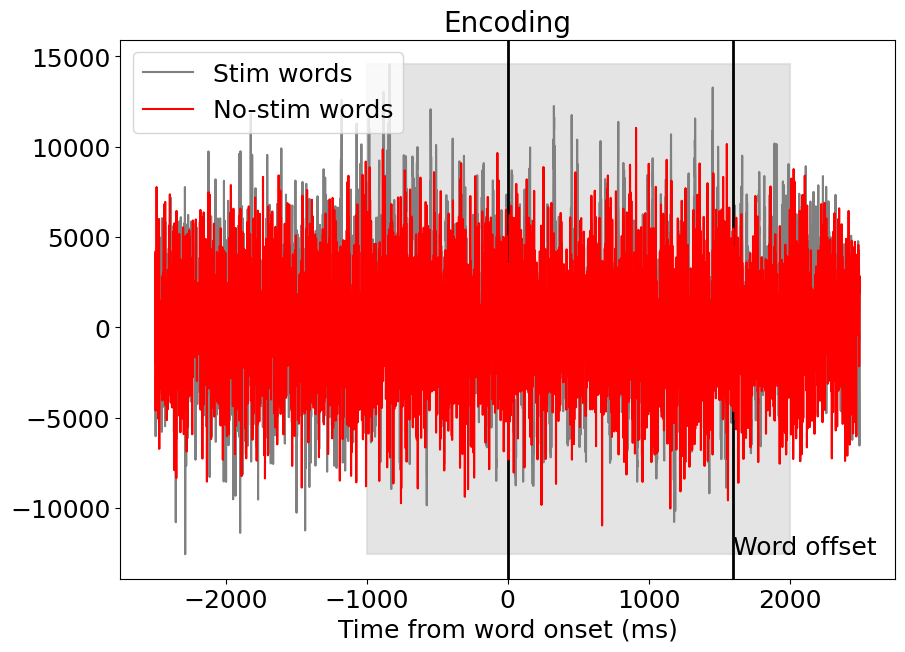

In [40]:

filter_line_noise = True # filter 60 and 120 hz

# word_evs = evs[evs.type=='WORD']
events=[Estim,Enostim]
events_title=['Stim Words','No-Stim Words']


buf = 2000
if 'stim_params' in Estim.columns:
    Estim=Estim.drop(columns='stim_params')
eeg_ptsa = reader.load_eeg(Estim, rel_start=-500 - buf, rel_stop=500 + buf, scheme=pairs).to_ptsa()
# pairs = reader.load('pairs')

# Butterworth filter to remove 60 Hz line noise + harmonic at 120
if filter_line_noise == True:
    eeg_ptsa = eeg_ptsa.filtered([58, 62])
    eeg_ptsa = eeg_ptsa.filtered([118, 122])

plt.figure(figsize=(10, 7))
eeg_chosen_channels=eeg_ptsa.isel(channel=stim_index)
eeg_raw = eeg_chosen_channels.mean(dim=['event','channel'])#.plot()
e=eeg_raw.plot(label = "Stim words",color='grey')

#3 plot
plt.xlabel('Time from word onset(ms)', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.axvline(x=0,color='black',linewidth=2)
plt.axvline(x=1600,color='black',linewidth=2)
# add rectangle
hight=abs(int(min(eeg_raw)))+int(max(eeg_raw))
rect = plt.Rectangle((-1000,int(min(eeg_raw))),3000,hight,linewidth=1.5,fill=True,alpha=0.6,facecolor='lightgrey', edgecolor='lightgrey',linestyle='-')
plt.text(1600, int(min(eeg_raw)), 'Word offset', fontsize = 18)
# Add the patch to the Axes
plt.gca().add_patch(rect)


# Plot no-stim data
if 'stim_params' in Enostim.columns:
    Enostim=Enostim.drop(columns='stim_params')
eeg_ptsa = reader.load_eeg(Enostim, rel_start=-500 - buf, rel_stop=500 + buf, scheme=pairs).to_ptsa()

# Butterworth filter to remove 60 Hz line noise + harmonic at 120
if filter_line_noise == True:
    eeg_ptsa = eeg_ptsa.filtered([58, 62])
    eeg_ptsa = eeg_ptsa.filtered([118, 122])

eeg_chosen_channels=eeg_ptsa.isel(channel=stim_index)
eeg_raw = eeg_chosen_channels.mean(dim=['event','channel'])#.plot()
e=eeg_raw.plot(label = "No-stim words",color='red')
plt.legend(loc="upper left",fontsize=18)
e=plt.xlabel('Time from word onset (ms)', fontsize=18)
plt.title('Encoding', fontsize=20)

# plt.savefig(f"{fig_path}/stim_electrode_without_pair_encoding.pdf",transparent=True,bbox_inches='tight', pad_inches=0.08,format='pdf')

plt.show()


### Plot single trials (without averaging over trials as above)

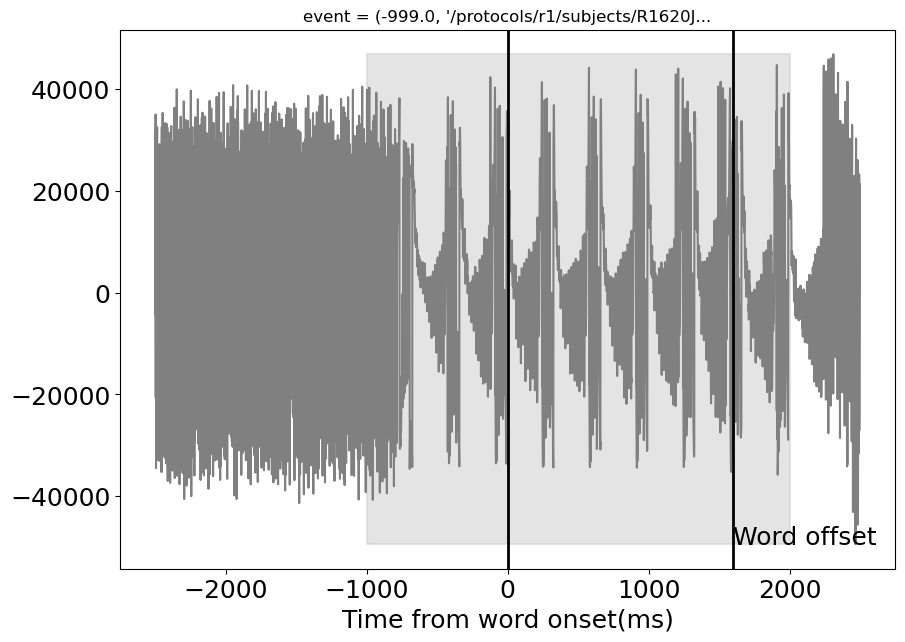

In [41]:

filter_line_noise = True # filter 60 and 120 hz

# word_evs = evs[evs.type=='WORD']
events=[Estim,Enostim]
events_title=['Stim Word','No-Stim Word']


buf = 2000
if 'stim_params' in Estim.columns:
    Estim=Estim.drop(columns='stim_params')
eeg_ptsa = reader.load_eeg(Estim, rel_start=-500 - buf, rel_stop=500 + buf, scheme=pairs).to_ptsa()

# Butterworth filter to remove 60 Hz line noise + harmonic at 120
if filter_line_noise == True:
    eeg_ptsa = eeg_ptsa.filtered([58, 62])
    eeg_ptsa = eeg_ptsa.filtered([118, 122])

plt.figure(figsize=(10, 7))
eeg_chosen_channels=eeg_ptsa.isel(channel=stim_index)
event_num=4 # arbitratily selected. This is one trial to plot
eeg_chosen_channels = eeg_chosen_channels[event_num]
eeg_raw = eeg_chosen_channels.mean(dim=['channel'])#.plot()
e=eeg_raw.plot(label = "Stim word",color='grey')

#3 plot
plt.xlabel('Time from word onset(ms)', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.axvline(x=0,color='black',linewidth=2)
plt.axvline(x=1600,color='black',linewidth=2)
# add rectangle
hight=abs(int(min(eeg_raw)))+int(max(eeg_raw))
rect = plt.Rectangle((-1000,int(min(eeg_raw))),3000,hight,linewidth=1.5,fill=True,alpha=0.6,facecolor='lightgrey', edgecolor='lightgrey',linestyle='-')
plt.text(1600, int(min(eeg_raw)), 'Word offset', fontsize = 18)
# Add the patch to the Axes
plt.gca().add_patch(rect)


# # Plot no-stim data
# if 'stim_params' in Enostim.columns:
#     Enostim=Enostim.drop(columns='stim_params')
# eeg_ptsa = reader.load_eeg(Enostim, rel_start=-500 - buf, rel_stop=500 + buf, scheme=pairs).to_ptsa()

# # Butterworth filter to remove 60 Hz line noise + harmonic at 120
# if filter_line_noise == True:
#     eeg_ptsa = eeg_ptsa.filtered([58, 62])
#     eeg_ptsa = eeg_ptsa.filtered([118, 122])

# eeg_chosen_channels=eeg_ptsa.isel(channel=stim_index)
# event_num=8
# eeg_chosen_channels = eeg_chosen_channels[event_num]
# eeg_raw = eeg_chosen_channels.mean(dim=['channel'])#.plot()
# # e=eeg_raw.plot(label = "No-stim word",color='red')
# plt.legend(loc="upper left",fontsize=18)
# e=plt.xlabel('Time from word onset (ms)', fontsize=18)
# plt.title('Encoding', fontsize=20)

# plt.savefig(f"{fig_path}/stim_pair_encoding_trial4.pdf",transparent=True,bbox_inches='tight', pad_inches=0.08,format='pdf')

plt.show()


## Stim during retrieval

 To be continued... I need to work on this part.

In [401]:
def retrieval_plot (evs,title):
    '''
    evs is a dataframe
    title is the title to be shown in the graph (should be string)
    '''
    filter_line_noise = True # filter 60 and 120 hz

    buf = 3000
    eeg_ptsa = reader.load_eeg(evs, rel_start=-1000 - buf, rel_stop=1000 + buf, scheme=pairs).to_ptsa()

    # Butterworth filter to remove 60 Hz line noise + harmonic at 120
    if filter_line_noise == True:
        eeg_ptsa = eeg_ptsa.filtered([58, 62])
        eeg_ptsa = eeg_ptsa.filtered([118, 122])

    plt.figure(figsize=(10, 7))
    eeg_chosen_channels=eeg_ptsa.isel(channel=stim_index)
    eeg_raw = eeg_chosen_channels.mean(dim=['event','channel'])#.plot()
    e=eeg_raw.plot(color='grey')

    # plot charachteristics
    plt.xlabel('Time from stimulation onset (ms)', fontsize=18)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.title(title,fontsize=18)
    # # add rectangle
    hight=abs(int(min(eeg_raw)))+int(max(eeg_raw))
    rect = plt.Rectangle((0,int(min(eeg_raw))),3000,hight,linewidth=1.5,fill=True,alpha=0.6,facecolor='lightgrey', edgecolor='lightgrey',linestyle='-')
    plt.text(3000, int(min(eeg_raw)), 'stimulation offset', fontsize = 18)
    # Add the patch to the Axes
    plt.gca().add_patch(rect)


Externalized Free Recall

In [402]:
retrieval_evs = evs[evs['phase']=='retrieval']
stim_retrieval_evs = retrieval_evs[retrieval_evs['type']=='STIM']
# stim_retrieval_evs.head(3)

In [403]:
retrieval_plot(stim_retrieval_evs,'Externalized free-recall')

ValueError: Events must correspond to one subject only